[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/francisco-ortin/data-science-course/blob/main/deep-learning/anns/function_estimation.ipynb)
[![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

# Function estimation with Keras/Tensorflow

This notebook shows how Keras and Tensorflow can be used to estimate the parameters of a given function, learning them from data. We must define the equation of the function (i.e., the model), setting the parameters to be learned from data as Tensorflow variables. Then, an optimizer (such as Gradient Descent) is used to learn the parameters. The only requirement is that the function must be differentiable, because Tensorflow will compute the derivatives automatically in order to minimize the loss using Gradient Descent.

In [1]:
# make sure the required packages are installed
%pip install pandas numpy seaborn matplotlib scikit-learn keras tensorflow --quiet
repo='data-science-course'
module='deep-learning/anns'
# if running in colab, install the required packages and copy the necessary files
if get_ipython().__class__.__module__.startswith('google.colab'):
    import os
    if not os.path.exists(repo):
        !git clone --filter=blob:none --sparse https://github.com/francisco-ortin/data-science-course.git 2>/dev/null
        !cd {repo} && git sparse-checkout init --cone && git sparse-checkout set {module}  2>/dev/null
    !cp --update {repo}/{module}/*.py . 2>/dev/null
    !mkdir -p img data
    !mv {repo}/{module}/img/* img/. 2>/dev/null
    !mv {repo}/{module}/data/* data/. 2>/dev/null

import numpy as np
import tensorflow as tf
from random import random
from keras.src.optimizers import SGD, Adam

from utils import plot_function, plot_functions

Note: you may need to restart the kernel to use updated packages.



## Ground truth

We define the ground truth: a function that we want to learn from data. 

The function to be learned follows the equation: $f(x) = a x^3 + b x^2 + cx + d$, where $a$, $b$, $c$ and $d$ are the parameters to be learned from data and $x$ the only input variable.

We create data for $x$ and $y$. $x$ ranges from -10 to 10 and $y$ is computed using the function above.

In [2]:
x = np.arange(-2, 2.1, 0.1)
# a, b, c, d are the parameters to be learned
a, b, c, d = 0.1, -0.2, 0.3, -0.4
y = a*(x**3) + b*(x**2) + c*x + d

We add some noise to the target variable $y$ in the dataset to make prediction more difficult.

In [3]:
noise = np.random.normal(0,0.01, len(x))
y = y + noise

## Visualization
Let's plot the y function:

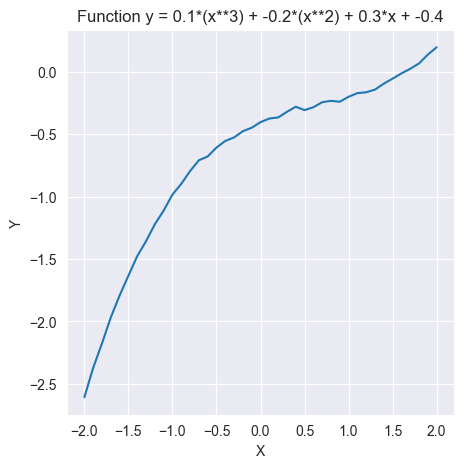

In [4]:
plot_function(x, y, f"Function y = {a}*(x**3) + {b}*(x**2) + {c}*x + {d}")

## Tensorflow Variables

We now create the four variables to be learned as Tensorflow variables. This is a pretty low level usage of Tensorflow, but it is useful to understand how it works.

In [5]:
A, B, C, D = tf.Variable(random()), tf.Variable(random()), tf.Variable(random()), tf.Variable(random())

## Loss function
We use MSE to compute the loss function (it is regression problem).

In [6]:
loss_mse = lambda: sum((y - (A * (x ** 3) + B * (x ** 2) + C * x + D)) ** 2) / (2*len(x))

## Optimizer

We use the [Adam optimizer](https://optimization.cbe.cornell.edu/index.php?title=Adam), which is much faster than SGD. Adam (Adaptive Moment Estimation) is a stochastic gradient descent method that is based on adaptive momentum. It is widely used in training deep neural networks. 

In [7]:
optimizer = Adam(learning_rate=0.1)

## Training

We now ask the optimizer to minimize the loss by applying the optimization algorith to the variables, learning their values from data. 

In [8]:
for epoch in range(200):
    with tf.GradientTape() as tape:
        # Compute the loss from the data (loss_mse computes the loss for x and y data, given the A, B, C, D parameters (initially random))
        loss = loss_mse()  
    # Compute gradients for the A, B, C, D parameters 
    gradients = tape.gradient(loss, [A, B, C, D])
    # Apply the gradients to the variables (to be explained later on)
    optimizer.apply_gradients(zip(gradients, [A, B, C, D]))
    # Print epoch results
    print("Epoch: {:3d}, loss: {:.10f}, A:{:.4f}, B: {:.4f}, C:{:.4f}, D:{:.4f}.".format(
        epoch, loss.numpy(), A.numpy(), B.numpy(), C.numpy(), D.numpy()))


Epoch:   0, loss: 2.9684913158, A:0.5139, B: 0.2059, C:0.4246, D:0.1561.
Epoch:   1, loss: 1.8587865829, A:0.4154, B: 0.1069, C:0.3261, D:0.0571.
Epoch:   2, loss: 1.0217813253, A:0.3200, B: 0.0100, C:0.2310, D:-0.0400.
Epoch:   3, loss: 0.4537570775, A:0.2304, B: -0.0833, C:0.1419, D:-0.1337.
Epoch:   4, loss: 0.1372433454, A:0.1499, B: -0.1710, C:0.0624, D:-0.2224.
Epoch:   5, loss: 0.0347639546, A:0.0824, B: -0.2507, C:-0.0033, D:-0.3037.
Epoch:   6, loss: 0.0864327326, A:0.0311, B: -0.3198, C:-0.0519, D:-0.3753.
Epoch:   7, loss: 0.2177975774, A:-0.0024, B: -0.3757, C:-0.0820, D:-0.4349.
Epoch:   8, loss: 0.3581337929, A:-0.0187, B: -0.4171, C:-0.0942, D:-0.4810.
Epoch:   9, loss: 0.4580259621, A:-0.0196, B: -0.4433, C:-0.0908, D:-0.5129.
Epoch:  10, loss: 0.4955326617, A:-0.0079, B: -0.4551, C:-0.0747, D:-0.5312.
Epoch:  11, loss: 0.4716604352, A:0.0137, B: -0.4539, C:-0.0488, D:-0.5368.
Epoch:  12, loss: 0.4017283320, A:0.0424, B: -0.4417, C:-0.0157, D:-0.5317.
Epoch:  13, loss:

## Evaluation
Let's see how far the parameters are from the actual function:

In [9]:
print(f"Original function: y = {a}*(x**3) + {b}*(x**2) + {c}*x + {d}.")
print("Function learned: y = {:.4f}*(x**3) + {:.4f}*(x**2) + {:.4f}*x + {:.4f}.".format(
    A.numpy(), B.numpy(), C.numpy(), D.numpy()))

Original function: y = 0.1*(x**3) + -0.2*(x**2) + 0.3*x + -0.4.
Function learned: y = 0.1019*(x**3) + -0.1993*(x**2) + 0.2933*x + -0.4003.


Not bad!

Let's visualize both functions to see whether there are important differences.

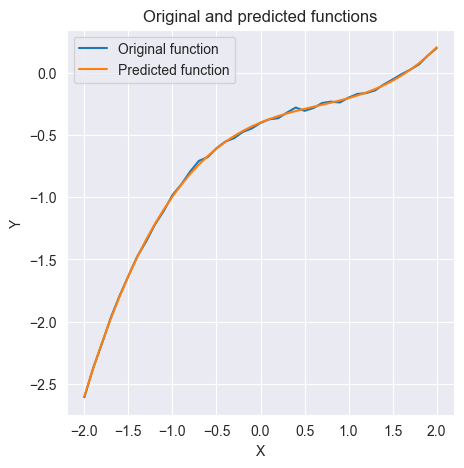

In [10]:
y_predicted = A.numpy()*(x**3) + B.numpy()*(x**2) + C.numpy()*x + D.numpy()
plot_functions(x, y, y_predicted, "Original and predicted functions")

## ✨ Questions ✨ 

1. What happens if you train the model for more epochs? Why? Try it out.
2. What happens if you do not add noise to y? Why? Try it out.
3. What happens if you add more noise (e.g., noise = np.random.normal(0, 1, len(x))). Why? Try it out.

### Answers

*Write your answers here.*



## Lesson learned

We have seen how Tensorflow can be used to estimate the parameters of any differentiable function from data. We have to define the model (the "shape" of the function) and Tensorflow will learn the parameters. The same as we did with linear regression (both use Gradient Descent or any other optimizer to minimize the loss function and hence learn the parameters). The power of deep learning is that it can learn complex functions from data and we do not need to specify the function "shape" in advance.